In [1]:
import jupyter, matplotlib, numpy as np, pandas as pd, scipy,sklearn
from sklearn.model_selection import train_test_split

## Price Predictor

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [5]:
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'LSTAT'}>],
       [<Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'MEDV'}>]], dtype=object)

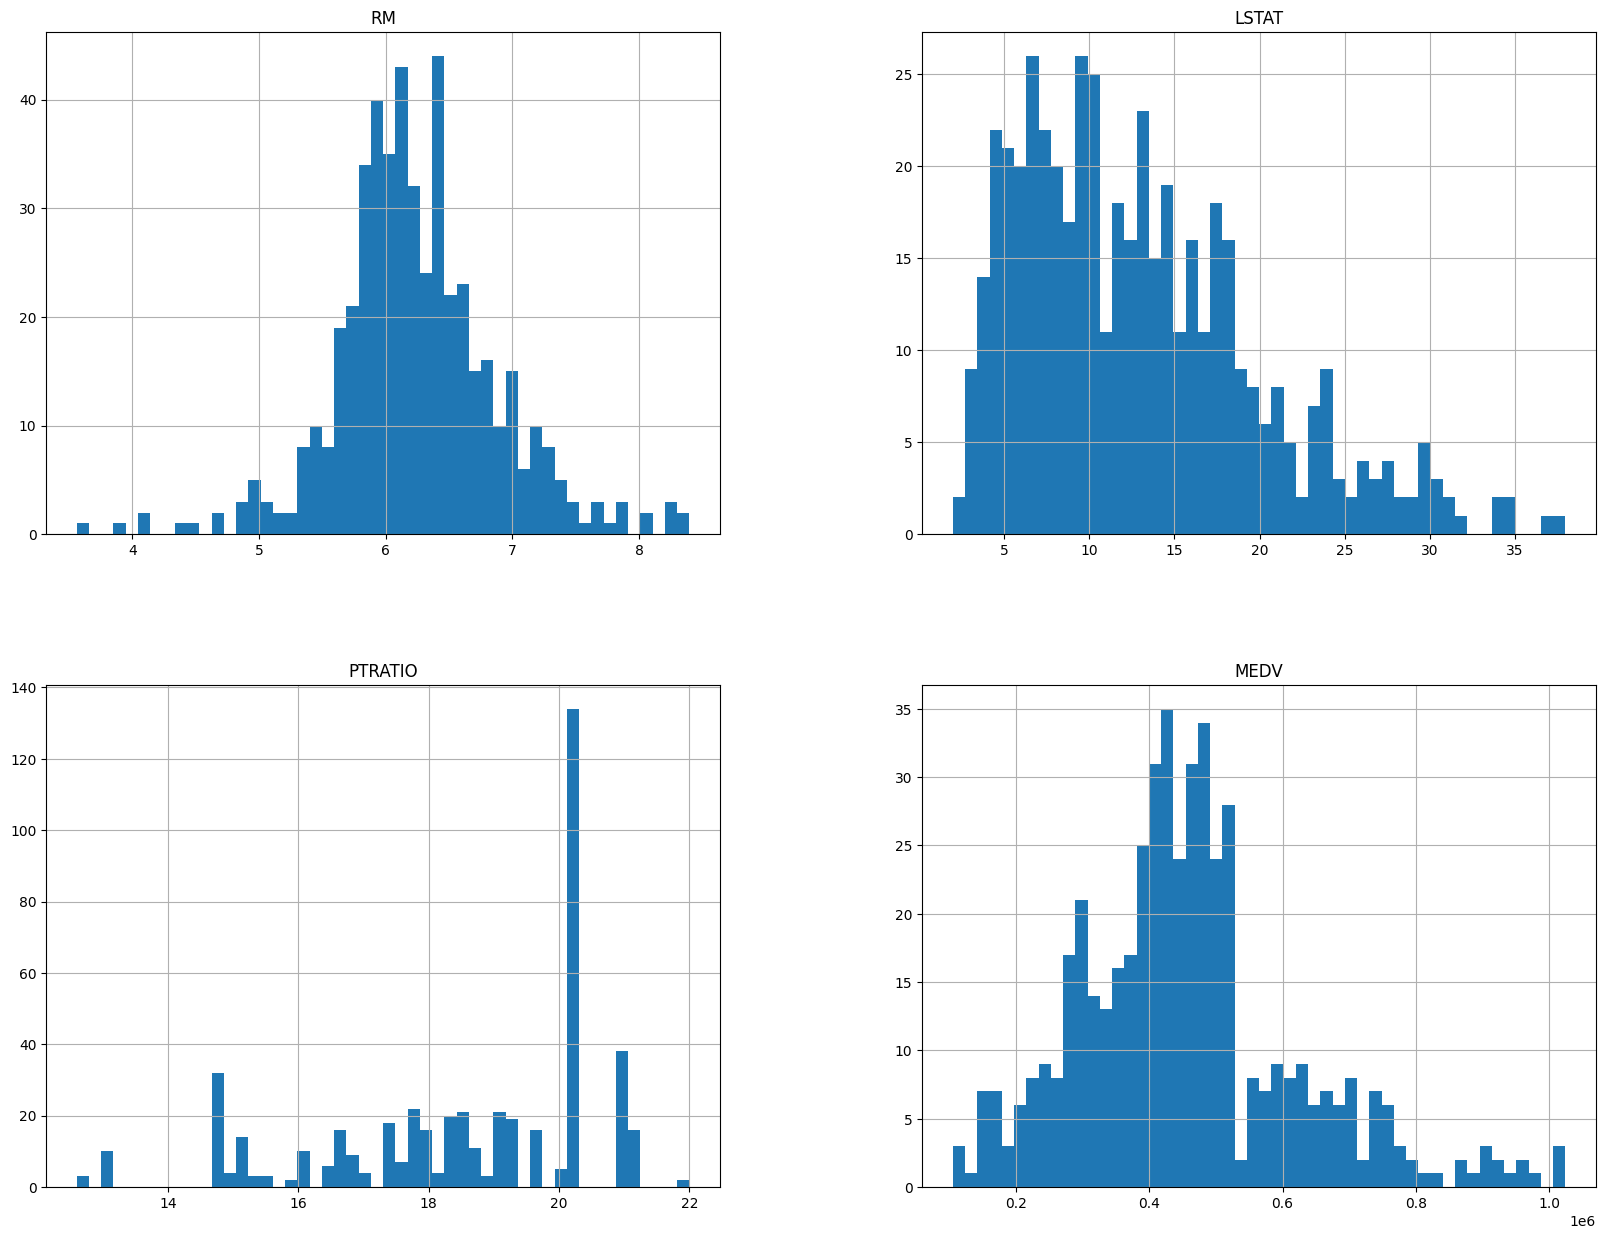

In [8]:
data.hist(bins=50,figsize=(20,15))

In [9]:
 def split_train_test(data,test_ratio):
        np.random.seed(42)
        shuffled = np.random.permutation(len(data))
        test_set_size= int(len(data) * test_ratio)
        test_indices = shuffled[:test_set_size]
        train_indices = shuffled[test_set_size:]
        return data.iloc[train_indices],data.iloc[test_indices]

In [10]:
#train_setx , test_setx = split_train_test(data,0.2)

In [11]:
# print(len(train_setx))
# print(len(test_setx))

In [12]:

train_set, test_set = train_test_split(data,test_size=0.2,random_state=42)
print(len(train_set))
print(len(test_set))

data = train_set.copy()

391
98


## Looking for Correlations

In [13]:
corr_matrix = data.corr()

In [14]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.706019
PTRATIO   -0.528776
LSTAT     -0.758349
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>,
        <Axes: xlabel='PTRATIO', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>,
        <Axes: xlabel='PTRATIO', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>,
        <Axes: xlabel='PTRATIO', ylabel='LSTAT'>],
       [<Axes: xlabel='MEDV', ylabel='PTRATIO'>,
        <Axes: xlabel='RM', ylabel='PTRATIO'>,
        <Axes: xlabel='LSTAT', ylabel='PTRATIO'>,
        <Axes: xlabel='PTRATIO', ylabel='PTRATIO'>]], dtype=object)

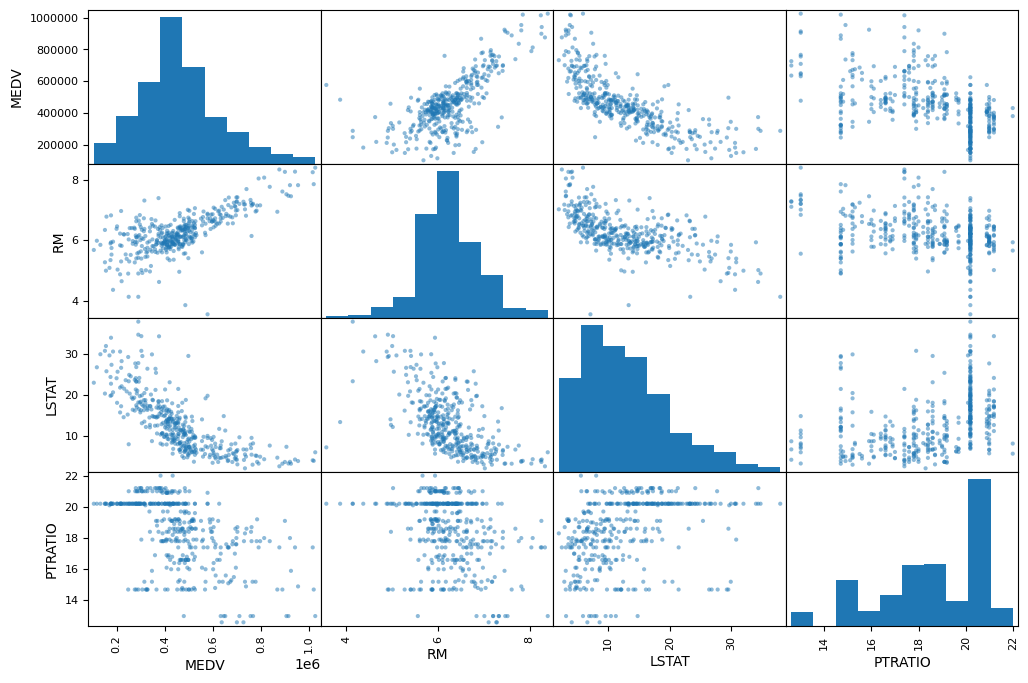

In [15]:
 from pandas.plotting import scatter_matrix
 attributes = ["MEDV","RM","LSTAT","PTRATIO"]
scatter_matrix(data[attributes],figsize=(12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

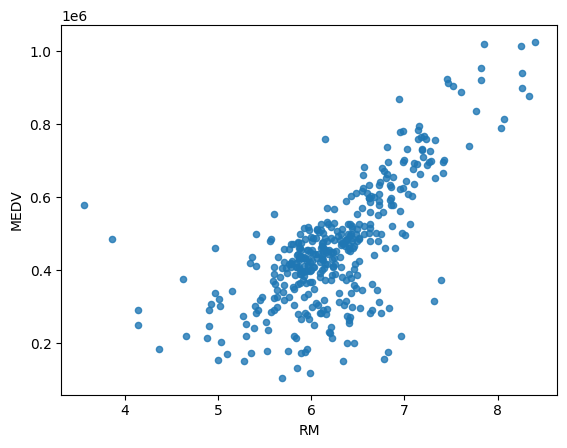

In [16]:
data.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

In [17]:

#print(train_set)
data = train_set.drop("MEDV",axis=1)
#print(train_set)
data_labels = train_set["MEDV"].copy()

## Attribute combinations

In [18]:
# data["RM"].fillna(median) to fill Empty with median 


In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(data)
imputer.statistics_

array([ 6.195, 11.41 , 18.9  ])

In [20]:
X = imputer.transform(data)


In [21]:
data_tr = pd.DataFrame(X,columns=data.columns)

In [22]:
data_tr.describe()

,RM,LSTAT,PTRATIO
count,391.000000,391.000000,391.000000
mean,6.257668,12.836598,18.441432
std,0.674118,7.127752,2.181947
min,3.561000,1.980000,12.600000
25%,5.886000,7.195000,17.000000
50%,6.195000,11.410000,18.900000
75%,6.630000,16.920000,20.200000
max,8.398000,37.970000,22.000000


## Creating Pipeline

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
    
])

In [24]:
data_num_tr = my_pipeline.fit_transform(data)
data_num_tr.shape

(391, 3)

## Selecting Model

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(data_num_tr,data_labels)

RandomForestRegressor()

In [26]:
some_data = data.iloc[10:]
some_labels = data_labels.iloc[10:]
print(some_labels)
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

42     531300.0
208    525000.0
237    388500.0
274    462000.0
249    756000.0
         ...   
106    409500.0
270    953400.0
348    474600.0
435    338100.0
102    390600.0
Name: MEDV, Length: 381, dtype: float64


array([519225., 546714., 395304., 468426., 745017., 431487., 464499.,
       273987., 887796., 316890., 334299., 416010., 423003., 344127.,
       400638., 163065., 356475., 722883., 455238., 670950., 637854.,
       333942., 366177., 486150., 426657., 512988., 836745., 430458.,
       478947., 190638., 280623., 580230., 437808., 469140., 571935.,
       442722., 410382., 458703., 402654., 207228., 688233., 414792.,
       432516., 410991., 442218., 300384., 425964., 443919., 738192.,
       981309., 366303., 485478., 360969., 414624., 439236., 800562.,
       550452., 423738., 418467., 491967., 476448., 270438., 222579.,
       174153., 744744., 446040., 277851., 367143., 310506., 421071.,
       449757., 499884., 468153., 162246., 245133., 470547., 382368.,
       433734., 298158., 420126., 351561., 984942., 839958., 489300.,
       581133., 473760., 872550., 538734., 504441., 191436., 691971.,
       485667., 415128., 473949., 555702., 324828., 469056., 432600.,
       649929., 4882

In [27]:
list(some_labels)

[531300.0,
 525000.0,
 388500.0,
 462000.0,
 756000.0,
 432600.0,
 485100.0,
 228900.0,
 898800.0,
 283500.0,
 319200.0,
 407400.0,
 420000.0,
 304500.0,
 392700.0,
 155400.0,
 338100.0,
 726600.0,
 483000.0,
 663600.0,
 672000.0,
 327600.0,
 367500.0,
 554400.0,
 407400.0,
 529200.0,
 835800.0,
 432600.0,
 474600.0,
 151200.0,
 304500.0,
 602700.0,
 455700.0,
 485100.0,
 602700.0,
 445200.0,
 405300.0,
 485100.0,
 422100.0,
 218400.0,
 701400.0,
 390600.0,
 424200.0,
 392700.0,
 455700.0,
 289800.0,
 407400.0,
 441000.0,
 781200.0,
 1014300.0,
 348600.0,
 569100.0,
 371700.0,
 415800.0,
 441000.0,
 867300.0,
 625800.0,
 428400.0,
 388500.0,
 504000.0,
 487200.0,
 247800.0,
 214200.0,
 170100.0,
 777000.0,
 455700.0,
 281400.0,
 373800.0,
 302400.0,
 315000.0,
 462000.0,
 512400.0,
 485100.0,
 151200.0,
 176400.0,
 466200.0,
 407400.0,
 457800.0,
 289800.0,
 487200.0,
 321300.0,
 1024800.0,
 789600.0,
 480900.0,
 592200.0,
 468300.0,
 924000.0,
 527100.0,
 506100.0,
 157500.0,
 697200.

## Evalution of Model

In [28]:
from sklearn.metrics import mean_squared_error,r2_score
data_predictions = model.predict(data_num_tr)
mse = mean_squared_error(data_labels,data_predictions)
rmse = np.sqrt(mse)
r2scores = r2_score(data_labels,data_predictions)


In [29]:
rmse


26891.8277726042

## Cross validation

In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,data_num_tr,data_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)


In [31]:
rmse_scores

array([57342.37001162, 76815.59661042, 83496.96200692, 88772.26917447,
       73304.38723674, 77092.34892896, 70894.84579128, 66552.09145185,
       61929.9387857 , 59214.2814342 ])

In [32]:
np.average(rmse_scores)

71541.50914321654

In [33]:
rmse_scores.std()

9863.256798530527

## Saving model

In [34]:
from joblib import dump,load
dump(model,'housing.joblib')

['housing.joblib']

In [35]:
x_test = test_set.drop("MEDV",axis=1)
y_test = test_set["MEDV"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_pred = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test,final_pred)
final_rmse = np.sqrt(final_mse)

In [38]:
final_pred

array([325038., 522291., 289338., 241857., 230559., 426090., 239211.,
       909909., 453096., 589134., 407106., 432264., 205758., 423528.,
       304542., 501984., 381696., 348432., 286944., 423381., 443415.,
       449778., 268128., 719880., 435876., 445158., 397425., 671307.,
       706440., 172620., 510111., 392007., 535437., 493143., 323526.,
       491568., 628110., 457884., 699153., 696990., 367605., 447279.,
       316428., 364749., 423528., 497847., 402696., 366891., 456645.,
       446754., 230265., 551565., 486738., 421407., 422331., 495138.,
       340767., 504756., 429219., 292215., 498309., 368529., 542556.,
       428064., 596568., 896427., 489174., 471807., 297759., 418257.,
       258720., 439173., 434868., 448392., 338709., 445284., 467817.,
       433944., 485772., 421386., 498099., 553476., 412524., 399147.,
       430080., 559986., 436107., 484554., 315672., 420840., 431592.,
       297360., 412797., 456330., 307839., 525000., 438417., 161133.])

In [39]:
y_test

451    401100.0
84     501900.0
434    319200.0
472    147000.0
428    247800.0
         ...   
317    405300.0
376    289800.0
56     518700.0
275    422100.0
398    151200.0
Name: MEDV, Length: 98, dtype: float64